In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import thermo
from profiles import *
import utils

In [4]:
# Directories

dirs = ['/vol0500/data/hp240116/fredrik/deep-botany/run_1-singlenode',
        '/vol0500/data/hp240116/fredrik/deep-botany/run_1-singlenode-lmostlocal-false',
        '/vol0500/data/hp240116/fredrik/deep-botany/run_1-small',
        '/vol0500/data/hp240116/fredrik/deep-botany/ensemble-1536/run_1',
       ]
labs = ['bsl', 'mostlocal-false', 'small', '1536']

dirs = ['/vol0500/data/hp240116/fredrik/deep-botany/ensemble-2/run_0',
        # '/vol0500/data/hp240116/fredrik/deep-botany/ensemble-2/run_0-2',
        '/vol0500/data/hp240116/fredrik/deep-botany/ensemble-2/run_0-52',
        '/vol0500/data/hp240116/fredrik/deep-botany/ensemble-2/run_0-mostlocaloff',
        '/vol0500/data/hp240116/fredrik/deep-botany/ensemble-2/run_0-simpleice2',
        '/vol0500/data/hp240116/fredrik/deep-botany/ensemble-2-1536/run_0',
        '/vol0500/data/hp240116/fredrik/deep-botany/ensemble-2-4608/run_0',
       ]
labs = ['bsl', 'adv 52', 'most-localoff', 'simpleice2', '1536', '4608']

member=xr.DataArray(data=labs, coords={'member':np.array(labs)})

In [5]:
tmsers = [dirs[i]+'/tmser.001.nc' for i in range(len(dirs))]
ds_tm = xr.open_mfdataset(tmsers, combine='nested', concat_dim=member)
ds_tm

<xarray.Dataset> Size: 5MB
Dimensions:  (time: 5040, member: 6)
Coordinates:
  * time     (time) datetime64[ns] 40kB 2024-08-01T00:01:00 ... 2024-08-04T12...
  * member   (member) <U13 312B 'bsl' 'adv 52' 'most-localoff' ... '1536' '4608'
Data variables: (12/42)
    cfrac    (member, time) float32 121kB dask.array<chunksize=(1, 5040), meta=np.ndarray>
    zb       (member, time) float32 121kB dask.array<chunksize=(1, 5040), meta=np.ndarray>
    zc_av    (member, time) float32 121kB dask.array<chunksize=(1, 5040), meta=np.ndarray>
    zc_max   (member, time) float32 121kB dask.array<chunksize=(1, 5040), meta=np.ndarray>
    zi       (member, time) float32 121kB dask.array<chunksize=(1, 5040), meta=np.ndarray>
    we       (member, time) float32 121kB dask.array<chunksize=(1, 5040), meta=np.ndarray>
    ...       ...
    rsdtm    (member, time) float32 121kB dask.array<chunksize=(1, 5040), meta=np.ndarray>
    rldtm    (member, time) float32 121kB dask.array<chunksize=(1, 5040), meta=np.ndarray>
    rsutm    (member, time) float32 121kB dask.array<chunksize=(1, 5040), meta=np.ndarray>
    rlutm    (member, time) float32 121kB dask.array<chunksize=(1, 5040), meta=np.ndarray>
    rsutmcs  (member, time) float32 121kB dask.array<chunksize=(1, 5040), meta=np.ndarray>
    rlutmcs  (member, time) float32 121kB dask.array<chunksize=(1, 5040), meta=np.ndarray>
Attributes:
    title:    tmser.001.nc
    history:  Created on 20250301 at 041051.840
    Source:   DALES 4.4.2 git: v4.4.1-779-g5d0bcc
    Author:

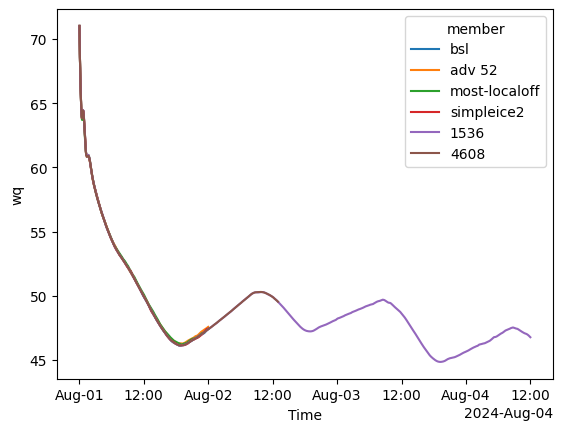

In [6]:
# Surface fluxes
cp=1004.
rho=1.225
Lv = 2.5e6

fig=plt.figure(); ax = plt.gca()
# (cp*rho*ds_tm['wtheta']).plot.line(x='time', ax=ax, add_legend=False)
(Lv*ds_tm['wq']).plot.line(x='time', ax=ax)

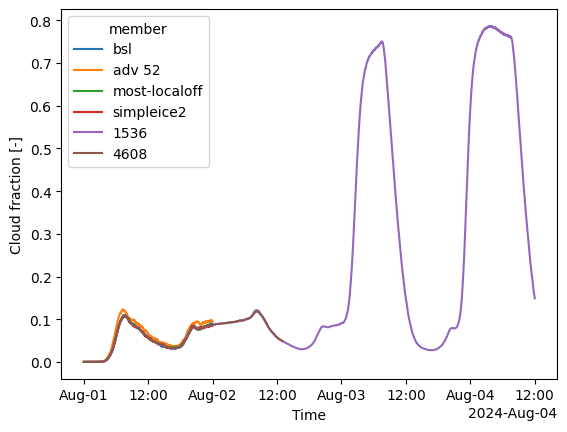

In [8]:
ls=ds_tm['cfrac'].plot.line(x='time')

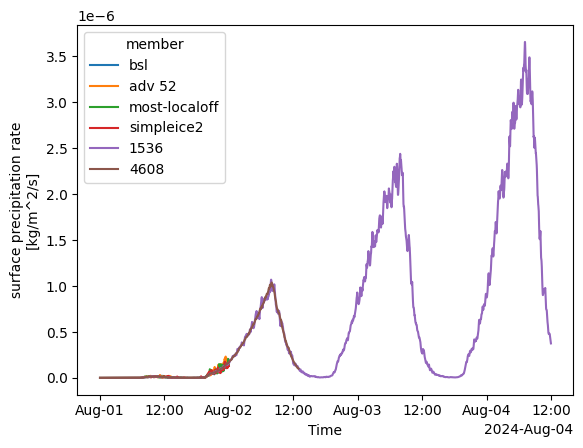

In [9]:
ls=ds_tm['pr'].plot.line(x='time')